
# **Qiskit** - quantum_info

Instale o pacote/ módulos do Qiskit

In [1]:
!pip install qiskit[visualization]
# Instalação do Qiskit e pacotes adicionais de visualização

!pip install qiskit-aer
# Instalação do Qiskit Aer, que fornece simuladores de alto desempenho para circuitos quânticos

!pip install qiskit-ibm-runtime
# Instalação do Qiskit IBM Quantum Runtime, permitindo acesso a recursos de computação quântica em nuvem


**Implementando um circuito**

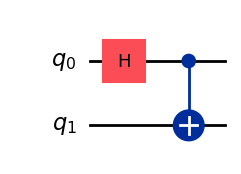

In [2]:
from qiskit import QuantumCircuit  # Importando a classe QuantumCircuit do pacote qiskit

qc = QuantumCircuit(2)
# Criando um circuito quântico com 2 qubits

qc.h(0)
# Aplicando uma porta Hadamard (H) no segundo qubit (qubit 1)

qc.cx(0,1)
# Aplicando uma porta CNOT (CX) controlada pelo segundo qubit e alvo no primeiro qubit

qc.draw('mpl')
# Desenhando o circuito quântico usando o método draw com o estilo 'mpl' (Matplotlib)

# **Vamos começar a utilizar os submódulos dos Qiskit para executar simulações:**

**submódulo quantum_info:**
É utilizado quando você prentende simular os propriedades quânticas do estado de um saída de um circuito


---


***qiskit.quantum_info*** é um submódulo do Qiskit Terra que fornece uma coleção de ferramentas para trabalhar com informações quânticas. Ele é especialmente útil para manipular e analisar estados quânticos, operadores quânticos e realizar cálculos teóricos em computação quântica.

Aqui estão algumas das principais funcionalidades do qiskit.quantum_info:

**1- Estados Quânticos:**

*Statevector*: Representação de vetores de estado puro.

*DensityMatrix*: Representação de matrizes densidade para estados mistos.

**2- Operadores Quânticos:**

*Operator*: Representação de operadores unitários.

*SuperOp*: Representação de superoperadores.

*Pauli*: Representação de operadores de Pauli.

*Clifford*: Representação de operadores de Clifford

**3- Canal Quântico:**

*Kraus*: Representação de canais quânticos na forma de operadores de Kraus.

*Choi*: Representação de canais quânticos na forma de matriz de Choi.

*PTM*: Representação de canais quânticos na forma de matriz de transferência de Pauli.

**4- Ferramentas para Operações e Cálculos:**

*random_statevector*: Geração de vetores de estado aleatórios.

*partial_trace*: Cálculo da traço parcial.

*entropy*: Cálculo de entropia von Neumann.

*purity*: Cálculo da pureza de um estado quântico

**5- Medidas de Fidelidade e Distância:**

*state_fidelity*: Medida de fidelidade entre dois estados quânticos.

*process_fidelity*: Medida de fidelidade entre dois processos quânticos.

*average_gate_fidelity*: Medida de fidelidade média de uma porta quântica.

**6- Conversões e Representações:**

Conversão entre diferentes representações de estados e operadores, como de matriz densidade para vetores de estado ou de operadores de Pauli para operadores unitários.

In [3]:
import qiskit.quantum_info as qi
# Importamos o módulo qiskit.quantum_info e o renomeamos como qi para facilitar a referência posterior.

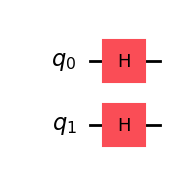

In [4]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
# Cria um circuito quântico com 2 qubits. Aqui, `qc` é uma instância de QuantumCircuit com dois qubits.

qc.h([0,1])
# Aplica um portão Hadamard nos qubits na ordem especificada. Nesse caso, um Hadamard é aplicado ao qubit 1 e outro ao qubit 0.

qc.draw('mpl')
# Desenha o circuito quântico usando o back-end Matplotlib. Isso cria uma visualização do circuito.

# qc.draw() # Se descomentada, essa linha desenharia o circuito usando o método de desenho padrão, que pode variar dependendo do ambiente em que o código é executado.


1 - Vamos supor que queremos simular o estado quântico deste sistema

In [5]:
psi = qi.Statevector(qc)
# Criamos um objeto Statevector a partir do circuito quântico qc. Aqui, `psi` representa o estado quântico resultante após a aplicação do circuito.

print(psi)
# Imprimimos o estado quântico resultante.

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


In [6]:
psi.draw('latex')
# Desenha o estado quântico em formato LaTeX. Isso cria uma representação visual do estado quântico usando LaTeX, o que pode ser útil para apresentações ou relatórios.


<IPython.core.display.Latex object>

2 - Vamos supor que queremos calcular as probabilidades de cada um desses estados

In [7]:
probs = psi.probabilities()
# Calcula as probabilidades dos estados quânticos presentes no vetor de estado psi. O resultado é uma lista de probabilidades para cada estado possível.

print(probs)
# Imprime as probabilidades calculadas. Cada elemento da lista representa a probabilidade de encontrar o sistema no estado correspondente, indexado na ordem em que os estados foram listados.


[0.25 0.25 0.25 0.25]


3 - Ser quisermos contar a quantidade de resultados simulados em um deteminado estado

In [8]:
counts = psi.sample_counts(shots=1024)
# Gera amostras estatísticas dos resultados das medições do estado quântico representado por `psi`, com um total de 1024 repetições (ou "tiros").
# Cada resultado é uma contagem do número de ocorrências de cada possível resultado de medição.

print(counts)
# Imprime as co

{'00': 298, '01': 227, '10': 251, '11': 248}


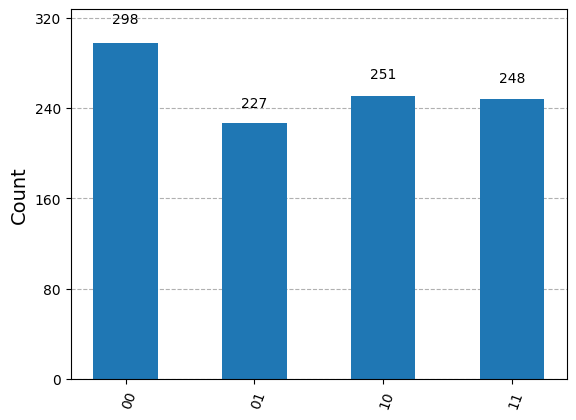

In [9]:
from qiskit.visualization import plot_histogram
# Importa a função plot_histogram do módulo qiskit.visualization. Essa função é usada para visualizar histogramas de contagens.

plot_histogram(counts)
# Plota um histograma dos resultados de medição representados pelos dados em 'counts'. Cada barra do histograma representa o número

4 - Ser quisermos simular algumas amostras da execução do nosso circuito

In [10]:
samples = psi.sample_memory(shots=10)
# Gera amostras dos resultados das medições do estado quântico representado por `psi`, mantendo a memória de cada amostra.
# O parâmetro `shots` especifica o número de repetições ou "tiros" do experimento.

print(samples)
# Imprime as amostras dos resultados de medição. Cada amostra representa um resultado específico de medição do sistema quântico após um número específico de "tiros".


['00' '00' '11' '10' '10' '01' '11' '11' '00' '01']


5 - Ser quisermos o valor esperado de alguma variável

In [11]:
O = qi.SparsePauliOp(['ZZ', 'XX', 'II'], [0.2, -0.3, 0.4])
# Cria um operador Pauli esparso representado pelos termos especificados.
# Os termos são 'ZZ', 'XX' e 'II', correspondendo a operadores Pauli em qubits 0 e 1, 0 e 1, e 0 e 0, respectivamente.
# Os coeficientes associados a cada termo são 0.2, -0.3 e 0.4, respectivamente.

In [12]:
O.to_operator()
#O método to_operator() em um objeto SparsePauliOp converte o operador esparso de Pauli em um objeto Operator do Qiskit,
#que é a representação densa (matricial) do operador. Isso permite que você manipule o operador como uma matriz densa e
#utilize todas as funcionalidades associadas a essa representação.

Operator([[ 0.6+0.j,  0. +0.j,  0. +0.j, -0.3+0.j],
          [ 0. +0.j,  0.2+0.j, -0.3+0.j,  0. +0.j],
          [ 0. +0.j, -0.3+0.j,  0.2+0.j,  0. +0.j],
          [-0.3+0.j,  0. +0.j,  0. +0.j,  0.6+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [13]:
from qiskit.visualization import array_to_latex
# Importa a função array_to_latex do módulo qiskit.visualization.
# Essa função é usada para representar arrays numpy como código LaTeX, que é útil para apresentações ou relatórios.

import numpy as np
# Importa a biblioteca numpy com o alias np.
# Numpy é amplamente utilizado para operações numéricas e manipulação de arrays multidimensionais em Python.

In [14]:
array_to_latex(O, prefix="\\text{Statevector} = ")
# Converte o operador Pauli esparso `O` em uma representação LaTeX.
# O parâmetro `prefix` define um texto de prefixo que será adicionado à representação LaTeX gerada.
# Isso é útil para adicionar contexto à representação LaTeX, como um rótulo ou descrição.

<IPython.core.display.Latex object>

In [15]:
O_exp = psi.expectation_value(O)
# Calcula o valor esperado do operador `O` com base no estado quântico representado por `psi`.
# Isso é útil para calcular expectativas de observáveis em um estado quântico específico.

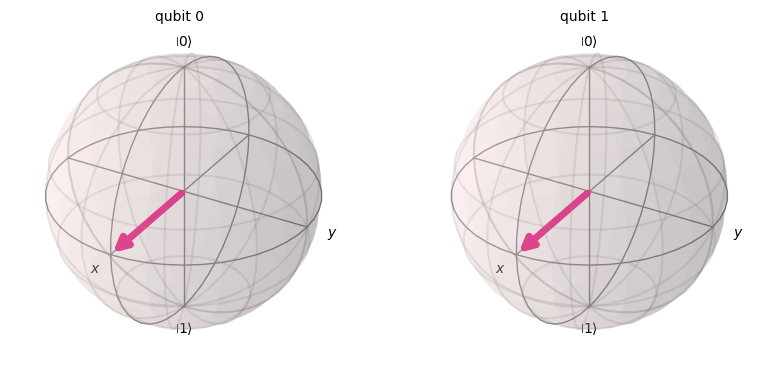

In [16]:
psi.draw('bloch')
# Desenha o estado quântico representado por `psi` em um gráfico de esfera de Bloch.
# Isso é útil para visualizar o estado de um único qubit em um espaço tridimensional, onde cada ponto na esfera de Bloch representa um estado quântico possível do qubit.
# Este método de visualização é fornecido pela biblioteca Qiskit e é útil para entender a distribuição do estado quântico em um qubit.

In [17]:
print(O_exp)
# Imprime o valor esperado do operador `O`.
# Este valor representa a média dos resultados possíveis da medição do operador `O` no estado quântico `psi`.

(0.10000000000000003+0j)


In [18]:
rho = qi.DensityMatrix(qc)
# Cria uma matriz de densidade representando o estado quântico do circuito quântico `qc`.
# Isso é útil para representar o estado quântico completo de um sistema, incluindo possíveis correlações entre diferentes qubits.

In [19]:
array_to_latex(rho, prefix="\\text{Statevector} = ")
# Converte a matriz de densidade `rho` em uma representação LaTeX.
# O parâmetro `prefix` define um texto de prefixo que será adicionado à representação LaTeX gerada.
# Isso é útil para adicionar contexto à representação LaTeX, como um rótulo ou descrição.

<IPython.core.display.Latex object>

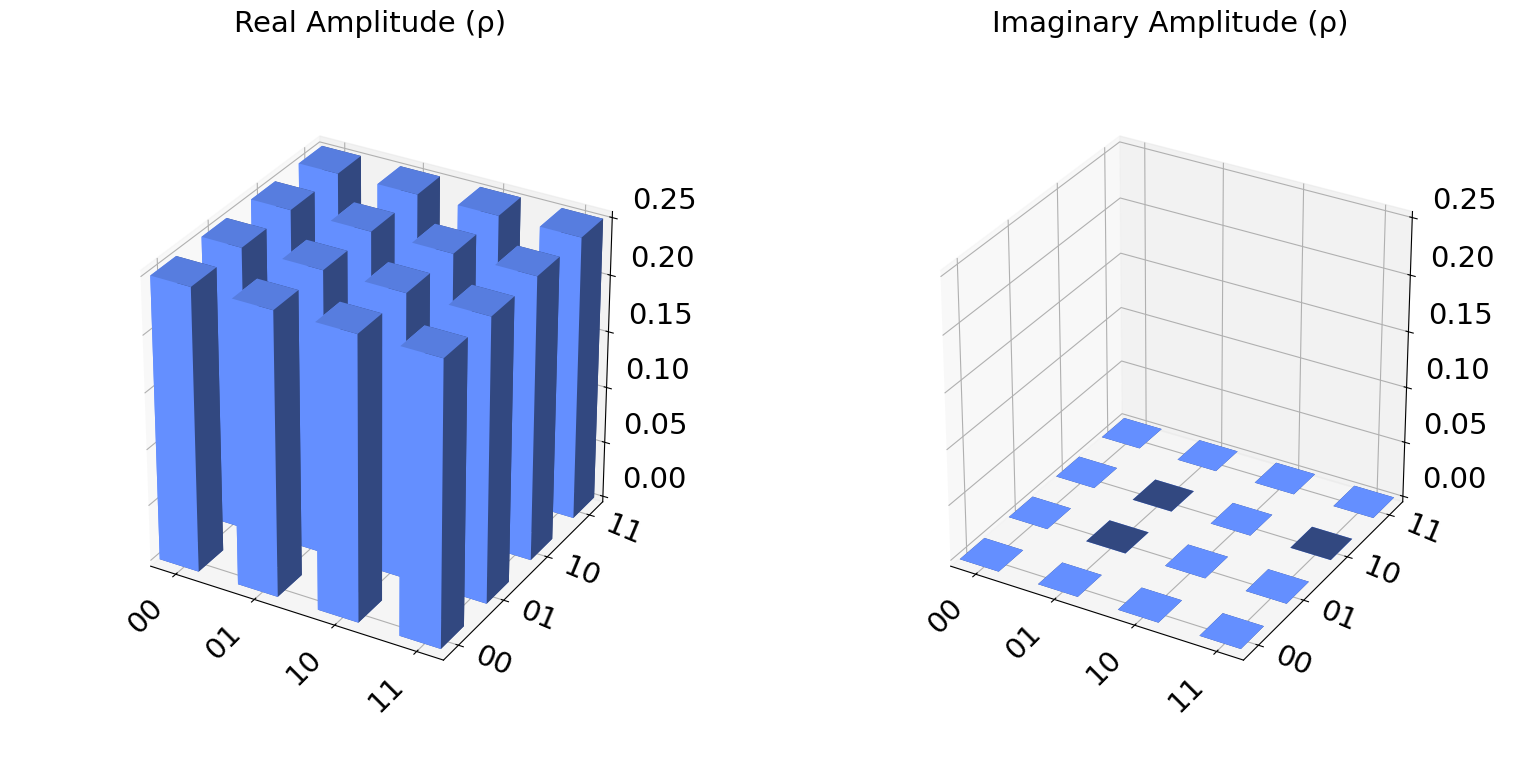

In [20]:
rho.draw('city')
# Desenha o estado quântico representado por `rho` em um gráfico de cidade.
# Esse método de visualização é fornecido pela biblioteca Qiskit e é útil para visualizar o estado quântico completo de um sistema, representado pela matriz de densidade, em um formato de gráfico de cidade.
# Cada bloco no gráfico de cidade representa um elemento da matriz de densidade, com a cor e o tamanho do bloco indicando o valor do elemento correspondente.

In [21]:
rho1 = qi.partial_trace(rho, [0])
# Calcula a matriz de densidade reduzida do qubit 0 a partir da matriz de densidade completa `rho`.
# Isso é feito realizando a operação de traço parcial sobre todos os qubits, exceto o qubit 0.


#Em resumo, a matriz densidade reduzida é uma ferramenta poderosa que permite descrever e analisar partes específicas de sistemas quânticos complexos,
#facilitando a análise de estados mistos, o cálculo de observáveis locais e a avaliação da entropia quântica.

In [22]:
array_to_latex(rho1, prefix="\\text{Statevector} = ")
# Converte a matriz de densidade reduzida `rho1` em uma representação LaTeX.
# O parâmetro `prefix` define um texto de prefixo que será adicionado à representação LaTeX gerada.
# Isso é útil para adicionar contexto à representação LaTeX, como um rótulo ou descrição.

<IPython.core.display.Latex object>

In [23]:
U = qi.Operator(qc)
# Cria um operador unitário representando a transformação realizada pelo circuito quântico `qc`.
# Isso é útil para representar a evolução temporal de um sistema quântico sob a ação do circuito quântico.

In [24]:
array_to_latex(U, prefix="\\text{Statevector U} = ")
# Converte o operador unitário `U` em uma representação LaTeX.
# O parâmetro `prefix` define um texto de prefixo que será adicionado à representação LaTeX gerada.
# Isso é útil para adicionar contexto à representação LaTeX, como um rótulo ou descrição.

<IPython.core.display.Latex object>

6 - Não podemos utilizar o quantum_info module se o sistema tiver alguma medição

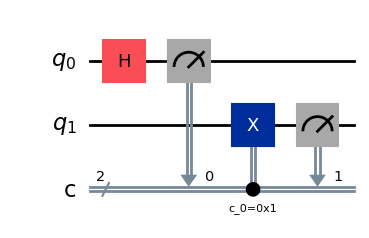

In [25]:
qc = QuantumCircuit(2,2)
# Cria um circuito quântico com 2 qubits e 2 bits clássicos. Aqui, `qc` é uma instância de QuantumCircuit com dois qubits e dois bits clássicos.

qc.h(0)
# Aplica uma porta Hadamard no qubit 0. Isso coloca o qubit 0 em uma superposição de |0⟩ e |1⟩.

qc.measure(0,0)
# Mede o qubit 0 e armazena o resultado da medição no bit clássico 0.

qc.x(1).c_if(0,1)  #controle condicional
# Aplica um portão X (bit-flip) no qubit 1 condicionalmente ao bit clássico 0 estar no estado |1⟩.

qc.measure(1,1)
# Mede o qubit 0 e armazena o resultado da medição no bit clássico 1.

qc.draw('mpl')
# Desenha o circuito quântico usando o back-end Matplotlib. Isso cria uma visualização do circuito.

Mensagem de erro:

In [26]:
qi.Statevector(qc)
# Cria um objeto Statevector representando o estado quântico do circuito quântico `qc`.
# Isso é útil para analisar o estado do sistema quântico após a aplicação de um circuito quântico.

QiskitError: 'Cannot apply instruction with classical bits: measure'

# **Resumo:**

**Use o quantum_info package para encontrar:**

* Vetor de estado de um circuito
* Matriz de densidade de um circuito
* Amostras de um estado
* Valor esperado com respeito à algum observável
* Fazer gráficos dos estados
* Traço parcial
* Encontrar as unitárias de um circuito

**Não use para:**

* Circuitos muito grandes (muitos qubits, muitos gates). A funções do quantum_info package não são otimizadas para isso e são construídas utilizando Álgebra Linear. Esses algoritmos não são eficientes para matrizes muito grandes.

* O circuito tem registradores clássicos ou medições no meio do circuito.